In [2]:
#%pip install pymc
#%pip install arviz

In [2]:
import matplotlib.pyplot as plt
from scipy.stats import norm as norm
from scipy.special import erf
from scipy.stats import binom
from scipy.stats import poisson
import numpy as np
import pymc as pm
import arviz as az


WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Plot Gaussian probability density function for a couple of different standard deviations in 
range from 0.2 to 2 (all in one plot). Label the axes appropriately

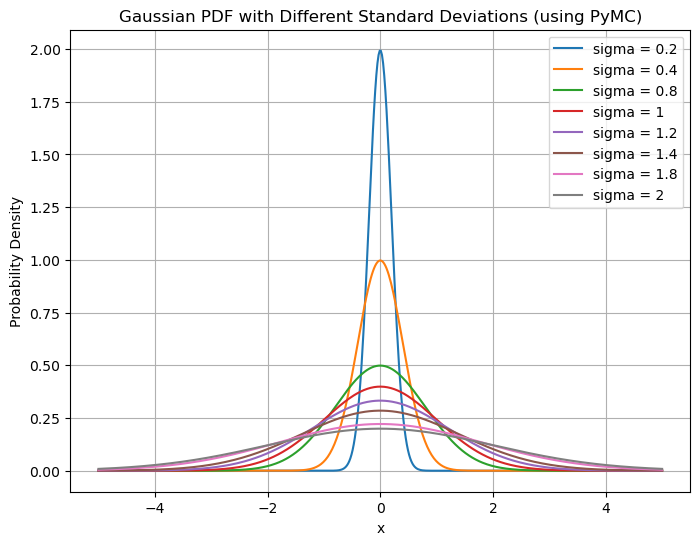

In [5]:
#Zakres x
x = np.linspace(-5, 5, 500)

#Odchylenia standardowe
std_devs = [0.2, 0.4, 0.8, 1, 1.2, 1.4, 1.8, 2]

plt.figure(figsize=(8, 6))

for sigma in std_devs:
    with pm.Model() as model:
        # Definiowanie rozkładu normalnego
        normal_dist = pm.Normal("normal_dist", mu=0, sigma=sigma)
        
        # Obliczanie logp i przekształcanie go na PDF
        logp_vals = pm.logp(normal_dist, x).eval()
        pdf_vals = np.exp(logp_vals)
        
        # Wykres dla każdego sigma
        plt.plot(x, pdf_vals, label=f'sigma = {sigma}')

# Labeling the plot
plt.title('Gaussian PDF with Different Standard Deviations')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

Plot Gaussian cumulative density function for a couple of different standard deviations in 
range from 0.2 to 2 (all in one plot). Label the axes appropriately.

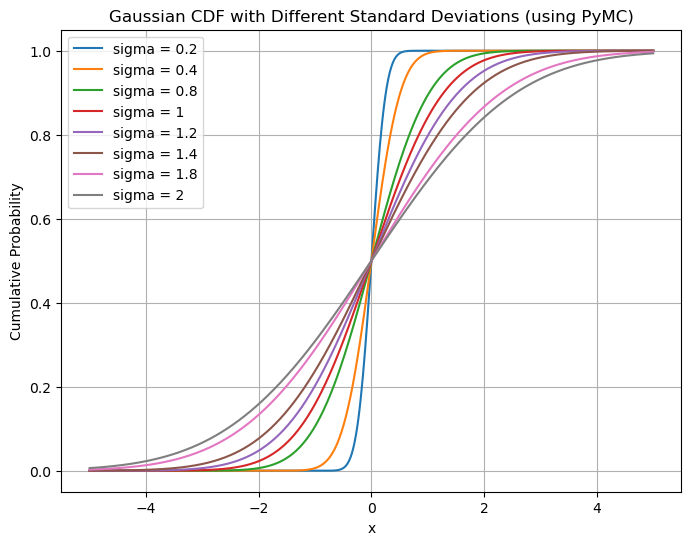

In [11]:
# Range of x values
x = np.linspace(-5, 5, 500)

# Standard deviations to plot
std_devs = [0.2, 0.4, 0.8, 1, 1.2, 1.4, 1.8, 2]

# Function to calculate CDF for a normal distribution
def normal_cdf(x, mu, sigma):
    return 0.5 * (1 + pm.math.erf((x - mu) / (sigma * np.sqrt(2))))

# Plotting
plt.figure(figsize=(8, 6))

for sigma in std_devs:
    with pm.Model() as model:
        # Calculate CDF for each sigma
        cdf_vals = normal_cdf(x, 0, sigma).eval()
        
        # Plot for each sigma
        plt.plot(x, cdf_vals, label=f'sigma = {sigma}')

# Labeling the plot
plt.title('Gaussian CDF with Different Standard Deviations')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)
plt.show()

Plot as in 2 and 3, but make two subplots in one plot: the top containing pdfs, the bottom 
containing cdfs


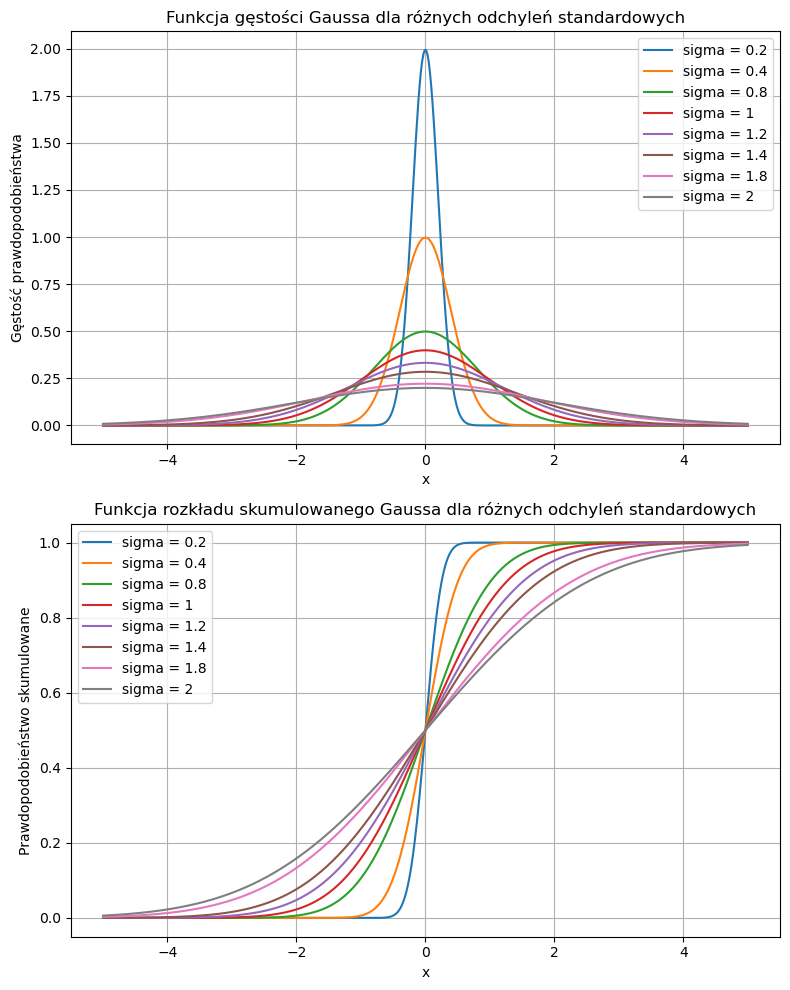

In [14]:
# Tworzenie wykresów: górny dla PDF, dolny dla CDF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

# Rysowanie funkcji gęstości prawdopodobieństwa (PDF) na górnym podwykresie
for sigma in std_devs:
    with pm.Model() as model:
        # Definiowanie rozkładu normalnego
        normal_dist = pm.Normal("normal_dist", mu=0, sigma=sigma)
        
        # Obliczanie logp i przekształcanie go na PDF
        logp_vals = pm.logp(normal_dist, x).eval()
        pdf_vals = np.exp(logp_vals)
        
        # Wykres dla każdego sigma
        ax1.plot(x, pdf_vals, label=f'sigma = {sigma}')
ax1.set_xlabel('x')
ax1.set_ylabel('Gęstość prawdopodobieństwa')
ax1.set_title('Funkcja gęstości Gaussa dla różnych odchyleń standardowych')
ax1.legend()
ax1.grid(True)

# Rysowanie funkcji rozkładu skumulowanego (CDF) na dolnym podwykresie
for sigma in std_devs:
    with pm.Model() as model:
        # Calculate CDF for each sigma
        cdf_vals = normal_cdf(x, 0, sigma).eval()
        
        # Plot for each sigma
        ax2.plot(x, cdf_vals, label=f'sigma = {sigma}')
ax2.set_xlabel('x')
ax2.set_ylabel('Prawdopodobieństwo skumulowane')
ax2.set_title('Funkcja rozkładu skumulowanego Gaussa dla różnych odchyleń standardowych')
ax2.legend()
ax2.grid(True)

# Dopasowanie układu wykresów
plt.tight_layout()
# Wyświetlenie wykresów
plt.show()

Plot binomial probability mass function for Bi(10, 0.5) and Bi(10, 0.1). Plot both in one plot 
(not subplots). Use red dots for the first one, green crosses for the second one. Add legend 
to the plot.


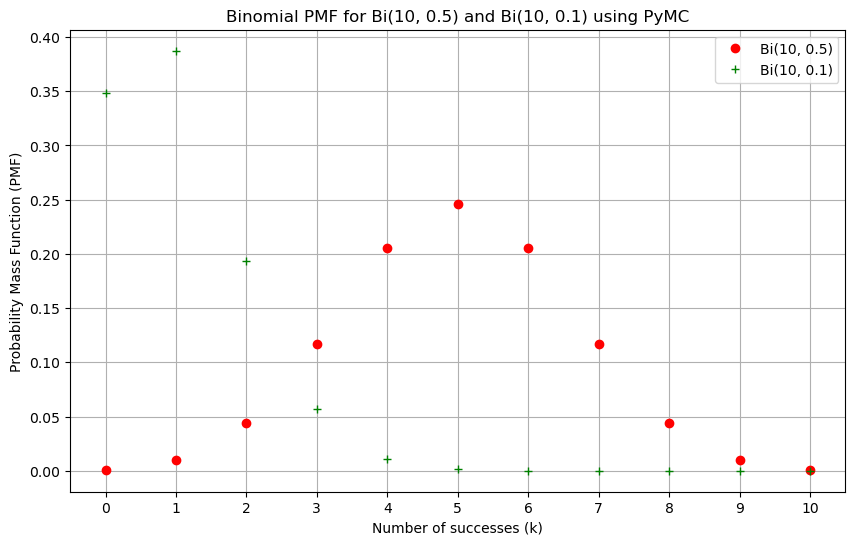

In [17]:
# Parametry rozkładu
n = 10  # liczba prób
p1 = 0.5  # prawdopodobieństwo sukcesu dla pierwszego rozkładu
p2 = 0.1  # prawdopodobieństwo sukcesu dla drugiego rozkładu

# Zakres wartości k (liczba sukcesów)
k = np.arange(0, n + 1)

# Rysowanie wykresu
plt.figure(figsize=(10, 6))

# Model dla Bi(10, 0.5)
with pm.Model() as model1:
    binom1 = pm.Binomial('binom1', n=n, p=p1)
    
    # Obliczanie logp dla Bi(10, 0.5)
    logp_vals1 = pm.logp(binom1, k).eval()  # Użycie logp do uzyskania wartości PMF
    pmf1 = np.exp(logp_vals1)  # PMF

# Model dla Bi(10, 0.1)
with pm.Model() as model2:
    binom2 = pm.Binomial('binom2', n=n, p=p2)
    
    # Obliczanie logp dla Bi(10, 0.1)
    logp_vals2 = pm.logp(binom2, k).eval()  # Użycie logp do uzyskania wartości PMF
    pmf2 = np.exp(logp_vals2)  # PMF

# Wykres dla Bi(10, 0.5)
plt.plot(k, pmf1, 'ro', label='Bi(10, 0.5)')  # czerwona kropka

# Wykres dla Bi(10, 0.1)
plt.plot(k, pmf2, 'g+', label='Bi(10, 0.1)')  # zielony krzyżyk

# Dodawanie legendy i etykiet
plt.title('Binomial PMF for Bi(10, 0.5) and Bi(10, 0.1)')
plt.xlabel('Number of successes (k)')
plt.ylabel('Probability Mass Function (PMF)')
plt.xticks(k)  # Etykiety osi X dla każdego k
plt.legend()
plt.grid()
plt.show()

Plot Poisson probability mass function for several values of the parameter, all in one plot. 
Use continuous line with crosses at data points. Add legend to the plot.

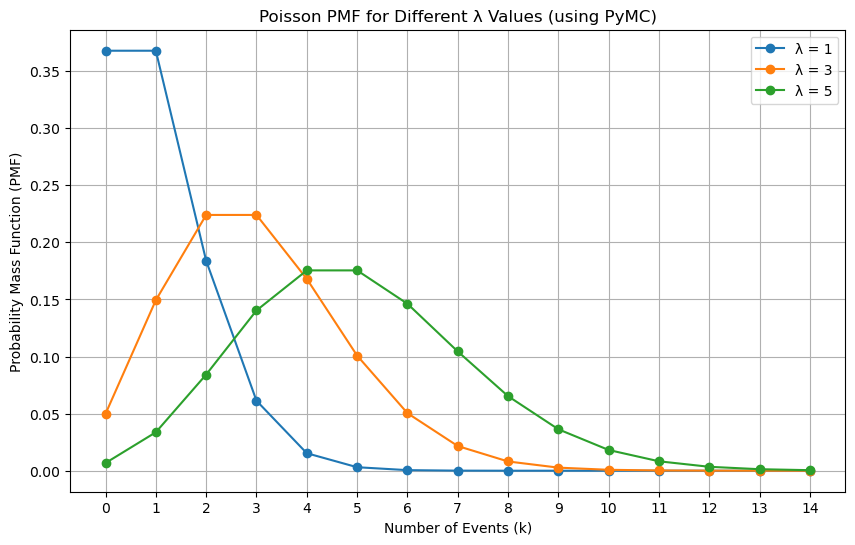

In [18]:
# Parametry rozkładu Poissona
lambdas = [1, 3, 5]  # różne wartości λ
k = np.arange(0, 15)  # zakres wartości k (liczba zdarzeń)

# Rysowanie wykresu
plt.figure(figsize=(10, 6))

for lambda_param in lambdas:
    with pm.Model() as model:
        # Definiowanie rozkładu Poissona
        poisson_dist = pm.Poisson('poisson_dist', mu=lambda_param)
        
        # Obliczanie logp i przekształcanie go na PMF
        logp_vals = pm.logp(poisson_dist, k).eval()  # logp dla wartości k
        pmf_vals = np.exp(logp_vals)  # przekształcenie logp na PMF

    # Wykres PMF dla każdej wartości λ
    plt.plot(k, pmf_vals, '-o', label=f'λ = {lambda_param}')  # linia z krzyżykami

# Dodawanie legendy i etykiet
plt.title('Poisson PMF for Different λ Values')
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability Mass Function (PMF)')
plt.xticks(k)  # Etykiety osi X dla każdego k
plt.legend()
plt.grid()
plt.show()